Refer code from Willi: https://github.com/mardatade/2024_mardata_OSCM_challenge_2_firstlook/blob/main/notebooks/2024-03-13_prep_aod_sat_data.ipynb

In [1]:
willi_path = "/home/jovyan/shared_materials/challenge_2_data/MCD19A2/"

In [2]:
import xarray as xr
import cmocean

In [3]:
dust_caboverde = xr.open_dataset(willi_path + "MCD19A2.06_cabo_verde.nc")

In [4]:
dust_caboverde

<xarray.Dataset>
Dimensions:            (lon: 66, lat: 50, time: 1302)
Coordinates:
  * lon                (lon) float64 -28.12 -27.88 -27.62 ... -12.12 -11.88
  * lat                (lat) float64 7.875 8.125 8.375 ... 19.62 19.88 20.12
    spatial_ref        int64 ...
  * time               (time) datetime64[ns] 2022-12-29 ... 2024-03-05
    fname              (time) object ...
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 ...
    Optical_Depth_055  (time, lon, lat) float64 ...

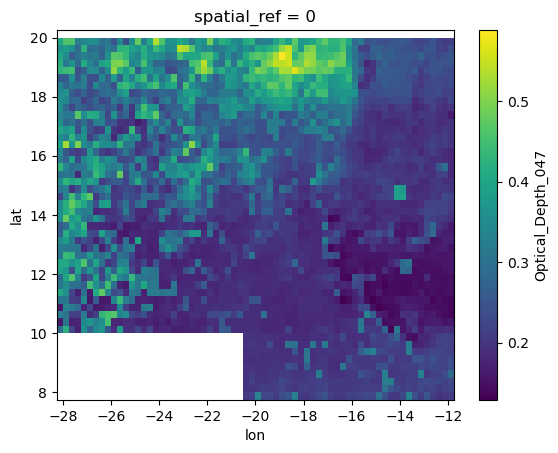

In [8]:
dust_caboverde.std("time").Optical_Depth_047.T.plot()

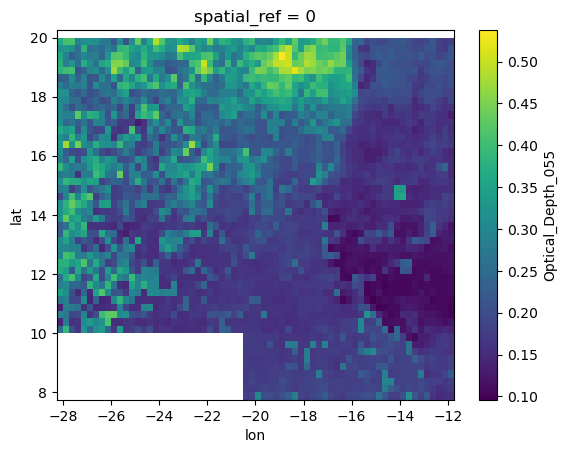

In [9]:
dust_caboverde.std("time").Optical_Depth_055.T.plot()

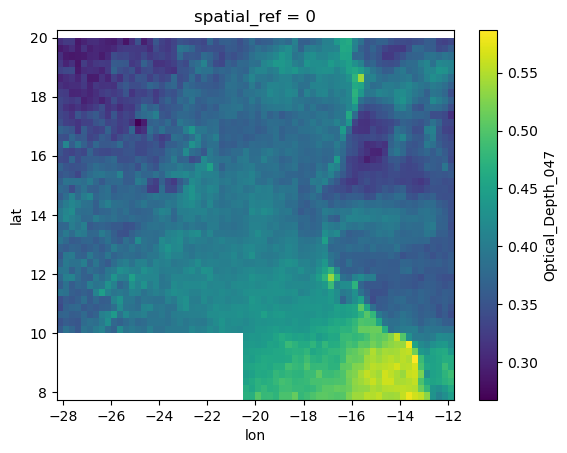

In [10]:
dust_caboverde.mean("time").Optical_Depth_047.T.plot()

In [11]:
dust_caboverde.Optical_Depth_047.mean("time")

<xarray.DataArray 'Optical_Depth_047' (lon: 66, lat: 50)>
array([[       nan,        nan,        nan, ..., 0.29037725, 0.30974565,
               nan],
       [       nan,        nan,        nan, ..., 0.29742568, 0.32137988,
               nan],
       [       nan,        nan,        nan, ..., 0.3095142 , 0.3209543 ,
               nan],
       ...,
       [0.41047877, 0.42557561, 0.45766724, ..., 0.33868474, 0.33323613,
               nan],
       [0.42559852, 0.44036508, 0.4703855 , ..., 0.3439699 , 0.32957527,
               nan],
       [0.44478739, 0.46048664, 0.47712559, ..., 0.36073293, 0.33668983,
               nan]])
Coordinates:
  * lon          (lon) float64 -28.12 -27.88 -27.62 ... -12.38 -12.12 -11.88
  * lat          (lat) float64 7.875 8.125 8.375 8.625 ... 19.62 19.88 20.12
    spatial_ref  int64 ...

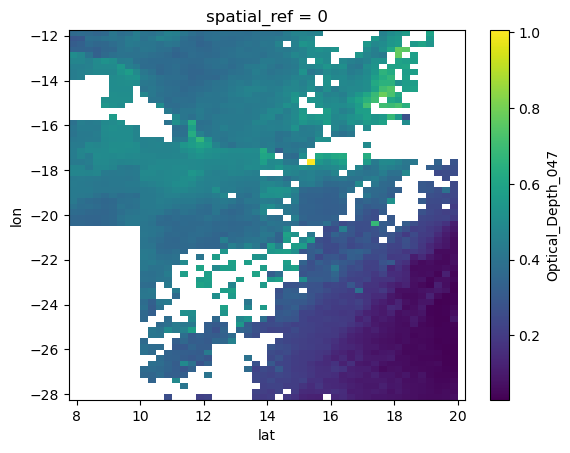

In [12]:
import matplotlib.pyplot as plt


optical_depth_047_specific_day = dust_caboverde.sel(time="2023-02-10").Optical_Depth_047.mean("time")

#plt.figure(figsize=(10, 8))
img = optical_depth_047_specific_day.plot.imshow()

#plt.colorbar(img, label="Optical Depth")  
plt.show()


In [13]:
# Step 1: Find the mean if time steps are the same
mean_over_time = dust_caboverde.groupby('time').mean('time')



In [ ]:
mean_over_time = mean_over_time.sel(time = slice("2022-12-29",  "2024-01-30"))

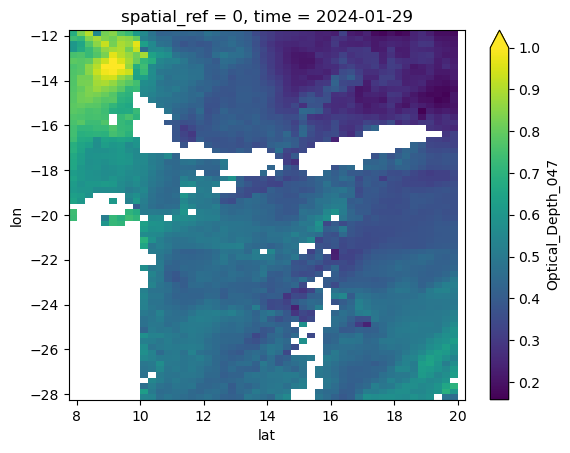

In [36]:
mean_over_time.sel(time="2024-01-29").Optical_Depth_047.plot.imshow(vmax = 1)

In [15]:
mean_over_time

<xarray.Dataset>
Dimensions:            (time: 398, lon: 66, lat: 50)
Coordinates:
  * lon                (lon) float64 -28.12 -27.88 -27.62 ... -12.12 -11.88
  * lat                (lat) float64 7.875 8.125 8.375 ... 19.62 19.88 20.12
    spatial_ref        int64 0
  * time               (time) datetime64[ns] 2022-12-29 ... 2024-01-30
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 nan nan nan ... 0.2465 nan
    Optical_Depth_055  (time, lon, lat) float64 nan nan nan ... 0.1767 0.18 nan

In [16]:
# Step 2: Coarsen or average over 5 days
dust_caboverde_coarsen = mean_over_time.coarsen(time=5, boundary='pad').mean()

In [17]:
dust_caboverde_coarsen

<xarray.Dataset>
Dimensions:            (time: 80, lon: 66, lat: 50)
Coordinates:
  * lon                (lon) float64 -28.12 -27.88 -27.62 ... -12.12 -11.88
  * lat                (lat) float64 7.875 8.125 8.375 ... 19.62 19.88 20.12
    spatial_ref        int64 0
  * time               (time) datetime64[ns] 2022-12-31 ... 2024-01-29
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 nan nan nan ... 0.2733 nan
    Optical_Depth_055  (time, lon, lat) float64 nan nan nan ... 0.1999 nan

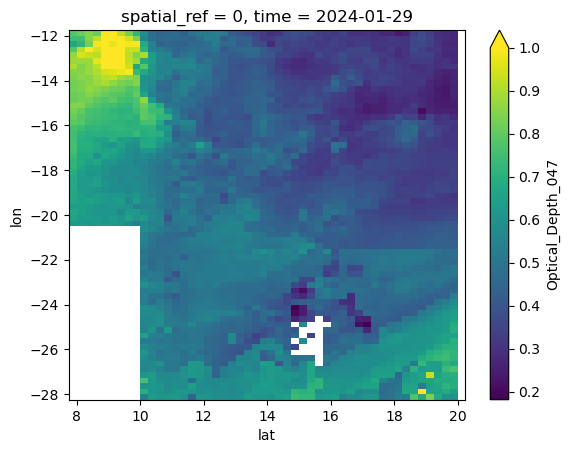

In [30]:
dust_caboverde_coarsen.sel(time="2024-01-29", method ="nearest").Optical_Depth_047.plot.imshow(vmax = 1)

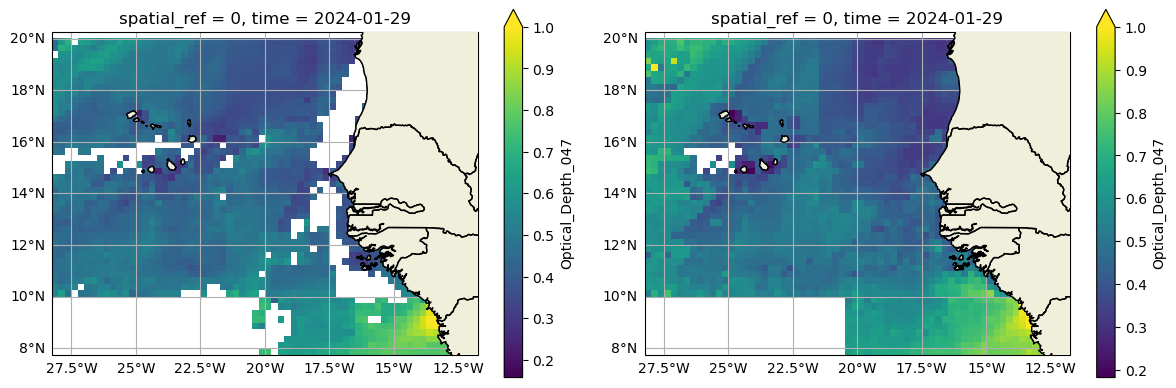

In [39]:
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis with the specified projection
fig, ax = plt.subplots(
    1, 2,
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
    figsize=(12, 4),
    sharey=True)

# Plot the dust data
mean_over_time.sel(time="2024-01-29").transpose('lat', 'lon').Optical_Depth_047.plot.imshow(ax=ax[0], vmax=1)
dust_caboverde_coarsen.sel(time="2024-01-29", method="nearest").transpose('lat', 'lon').Optical_Depth_047.plot.imshow(ax=ax[1], vmax=1)

# Add coastlines
for axis in ax:
    axis.coastlines()

# Add gridlines and tick labels for latitude and longitude
for axis in ax:
    gl = axis.gridlines(draw_labels=True)  # Add gridlines
    gl.top_labels = False  # Remove top labels
    gl.right_labels = False  # Remove right labels
    gl.xlabel_style = {'size': 10}  # Latitude label font size
    gl.ylabel_style = {'size': 10}  # Longitude label font size

# Add land feature
for axis in ax:
    axis.add_feature(cfeature.LAND, zorder=100)

# Add Natural Earth feature for Cabo Verde islands
for axis in ax:
    axis.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black', facecolor='none'), zorder=101)

fig.tight_layout()
plt.show()


In [145]:
dust_caboverde_coarsen.to_netcdf("dust_caboverde_coarsen.nc") 

In [143]:
latitude_range = (11, 20)
longitude_range = (-28, -20)
dust_caboverde_coarsen.sel(lat=slice(*latitude_range), lon=slice(*longitude_range))

<xarray.Dataset>
Dimensions:            (time: 80, lon: 32, lat: 36)
Coordinates:
  * lon                (lon) float64 -27.88 -27.62 -27.38 ... -20.38 -20.12
  * lat                (lat) float64 11.12 11.38 11.62 ... 19.38 19.62 19.88
    spatial_ref        int64 0
  * time               (time) datetime64[ns] 2022-12-31 ... 2024-01-29
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 0.1891 0.1609 ... 0.3645 0.3703
    Optical_Depth_055  (time, lon, lat) float64 0.1691 0.1519 ... 0.3415 0.3318

In [144]:
def plotTimeSeriesRegion(latitude_range, longitude_range, time_range, region_name):
    # Define the latitude and longitude range for Cape Verde
    plt.figure()
    dust_caboverde_coarsen_region = dust_caboverde_coarsen.sel(lat=slice(*latitude_range), lon=slice(*longitude_range))
    dust_caboverde_coarsen_region = dust_caboverde_coarsen_region.sel(time = slice(*time_range))
    spatial_mean = dust_caboverde_coarsen_region.mean(dim=['lat', 'lon'])
    
    # Plot the spatial mean against time
    spatial_mean.Optical_Depth_047.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Dust Spatial Mean')
    plt.title('Spatial Mean of Dust '+region_name)
    
    # Show the plot
    #plt.show()
    #plt.figure()
    plt.gca().grid()
    (
    dust_caboverde_coarsen
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(lat=slice(*latitude_range), lon=slice(*longitude_range))
    .Optical_Depth_047
    .plot(
        x="lon", y="lat",
        cmap=cmocean.cm.turbid,
        size=10,
    )
    )
    

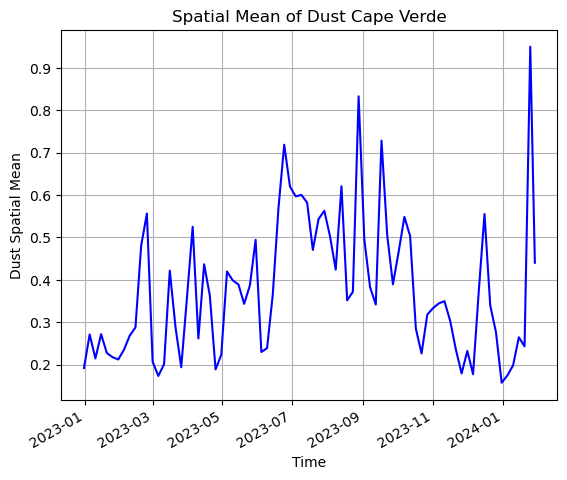

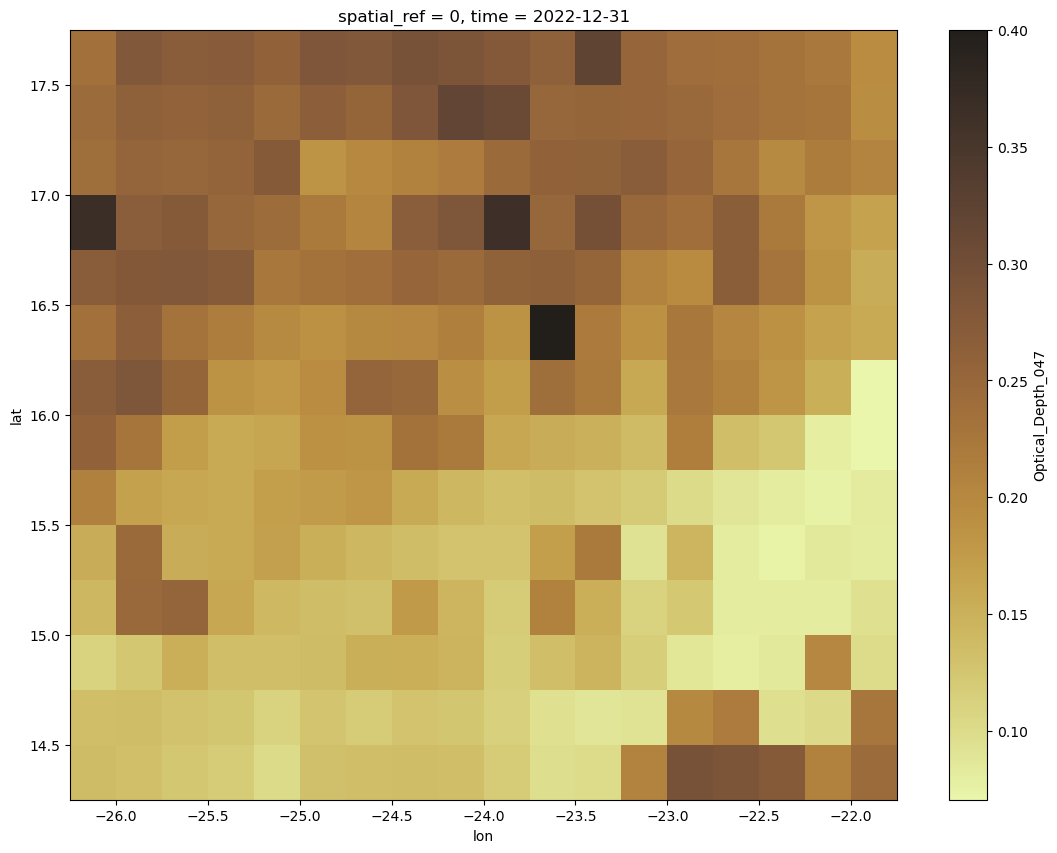

In [126]:
latitude_range = (14.18, 17.69)
longitude_range = (-26.2, -21.72)       
time_range = ("2022-12-01", "2024-03-01")
region_name = "Cape Verde"
plotTimeSeriesRegion(latitude_range, longitude_range, time_range, region_name)

In [124]:
import pandas as pd
data_mindelo = pd.read_csv("../excsl_Mardata_csv.csv")
data_mindelo

,Regions,max_long,max_lat,min_long,min_lat
0,North,-23.75,17.75,-26.00,16.00
1,East,-22.00,17.50,-24.00,14.75
2,South,-22.50,15.75,-25.25,14.50
3,Mindelo,-24.75,17.25,-25.25,16.75
4,Calhau,-24.50,17.25,-25.00,16.75
5,Sao_vicente,-24.75,17.25,-25.25,16.50


Latitude range (16.0, 17.75)
Longitude range (-26.0, -23.75)
Latitude range (14.75, 17.5)
Longitude range (-24.0, -22.0)
Latitude range (14.5, 15.75)
Longitude range (-25.25, -22.5)
Latitude range (16.75, 17.25)
Longitude range (-25.25, -24.75)
Latitude range (16.75, 17.25)
Longitude range (-25.0, -24.5)


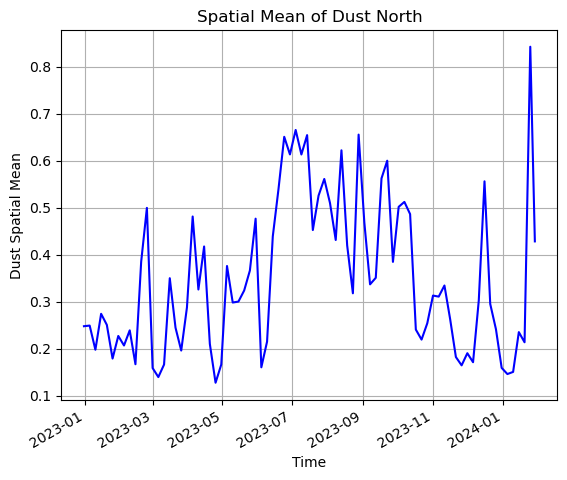

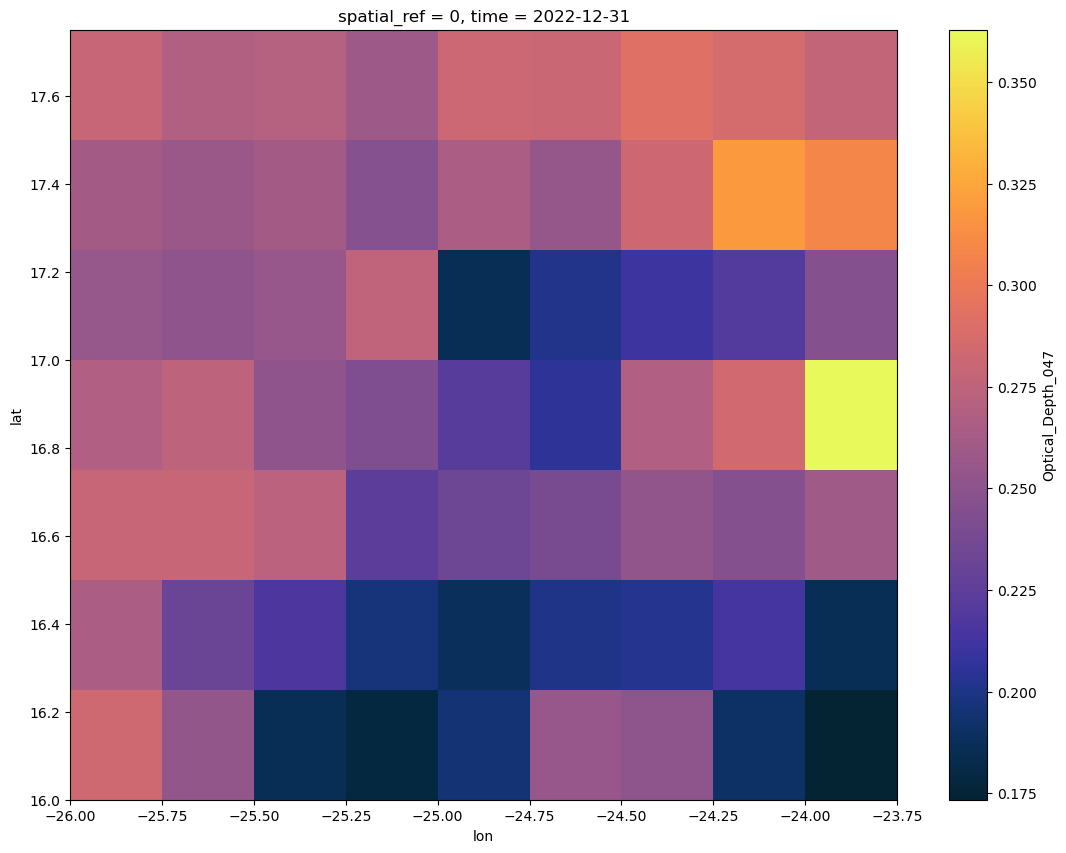

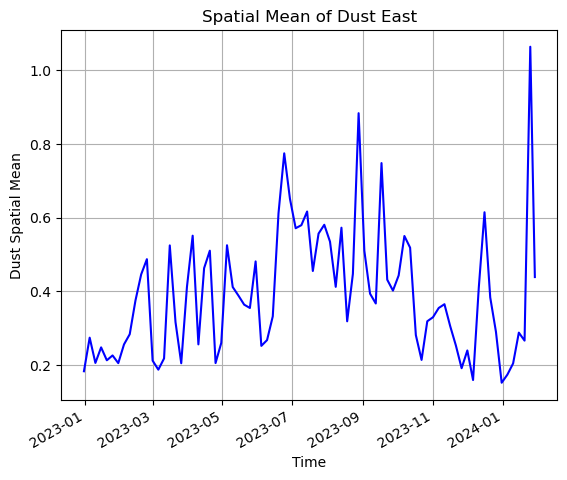

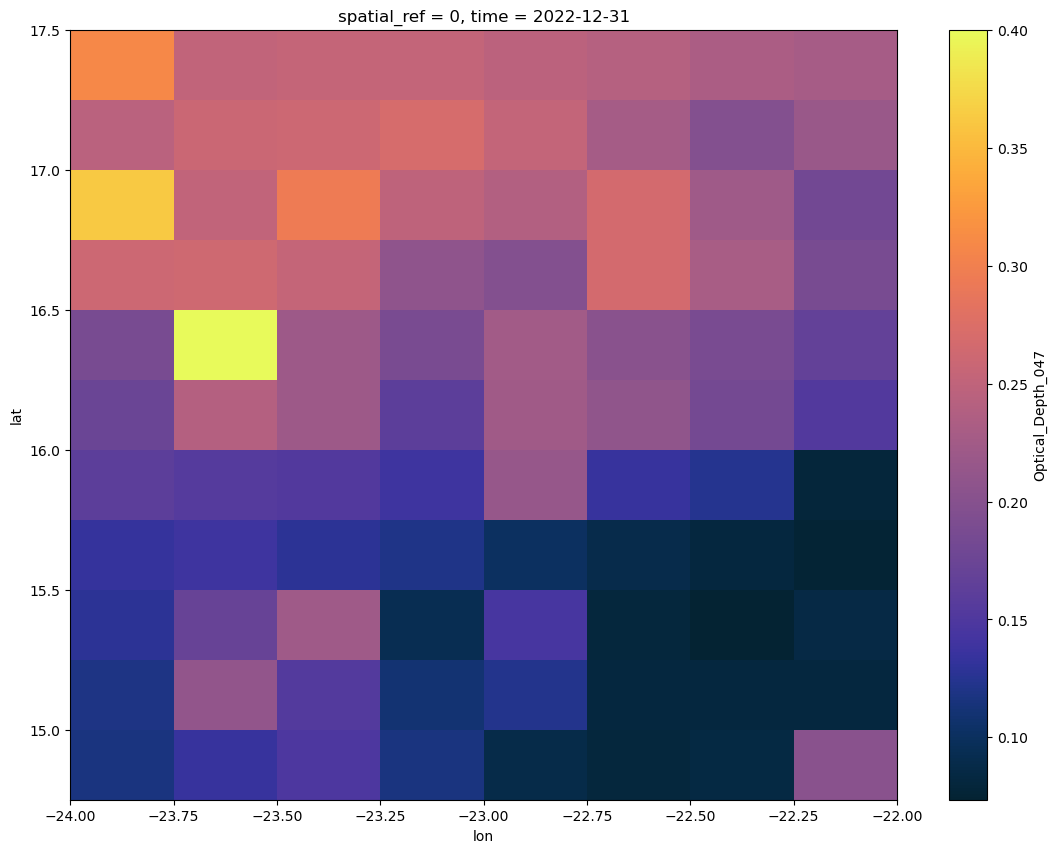

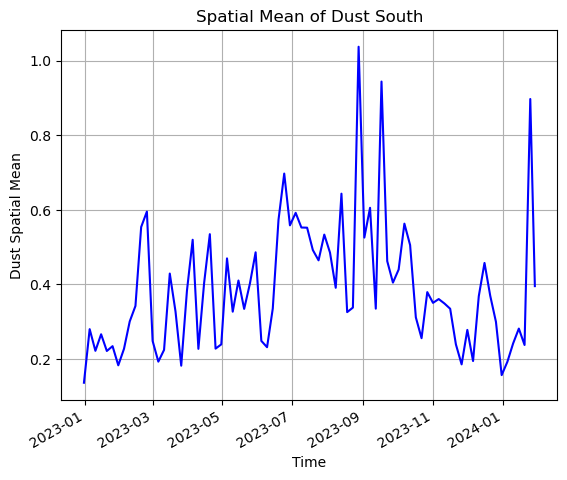

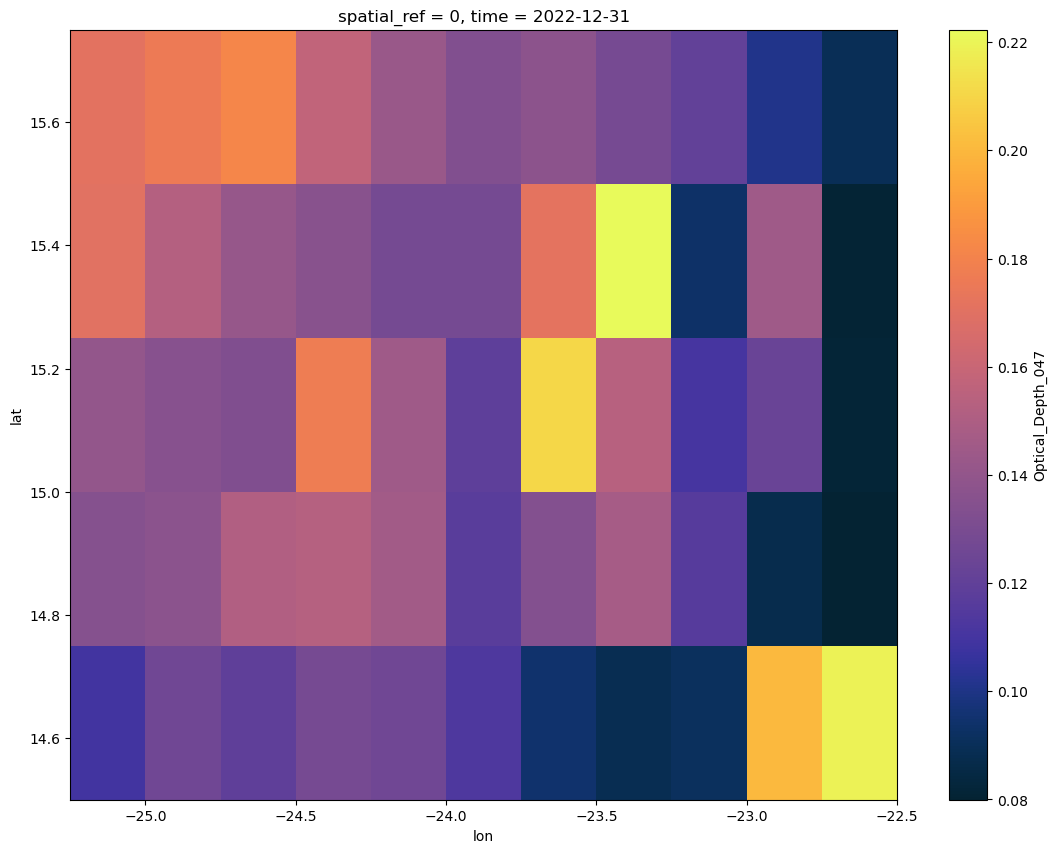

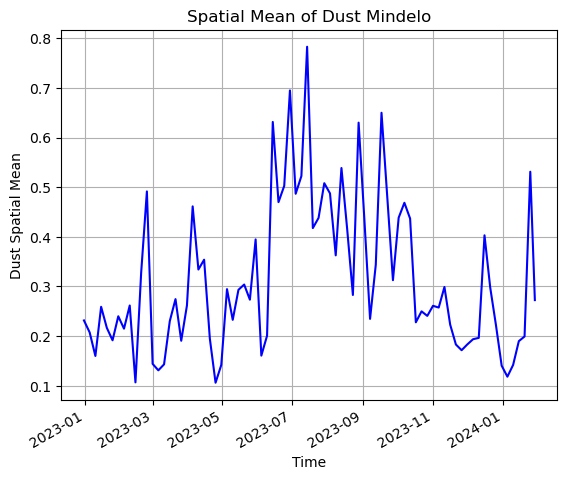

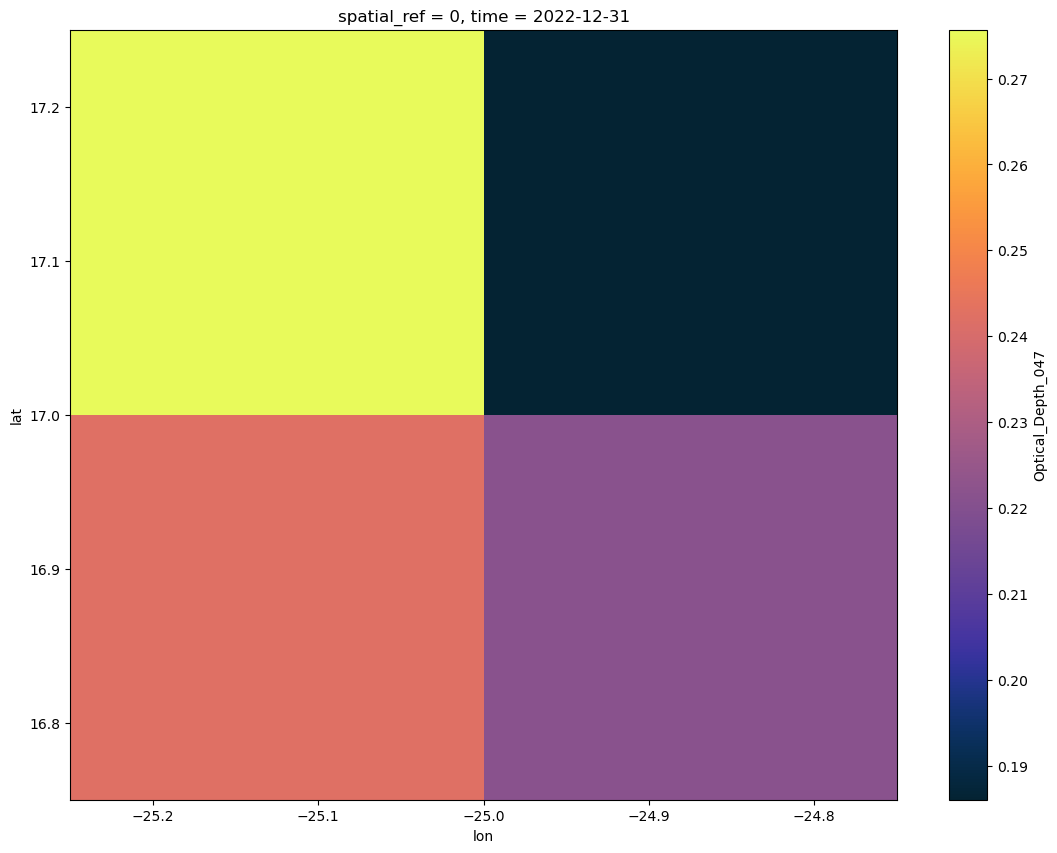

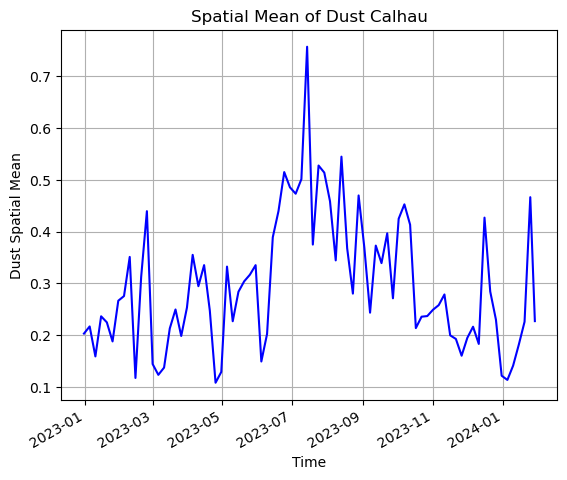

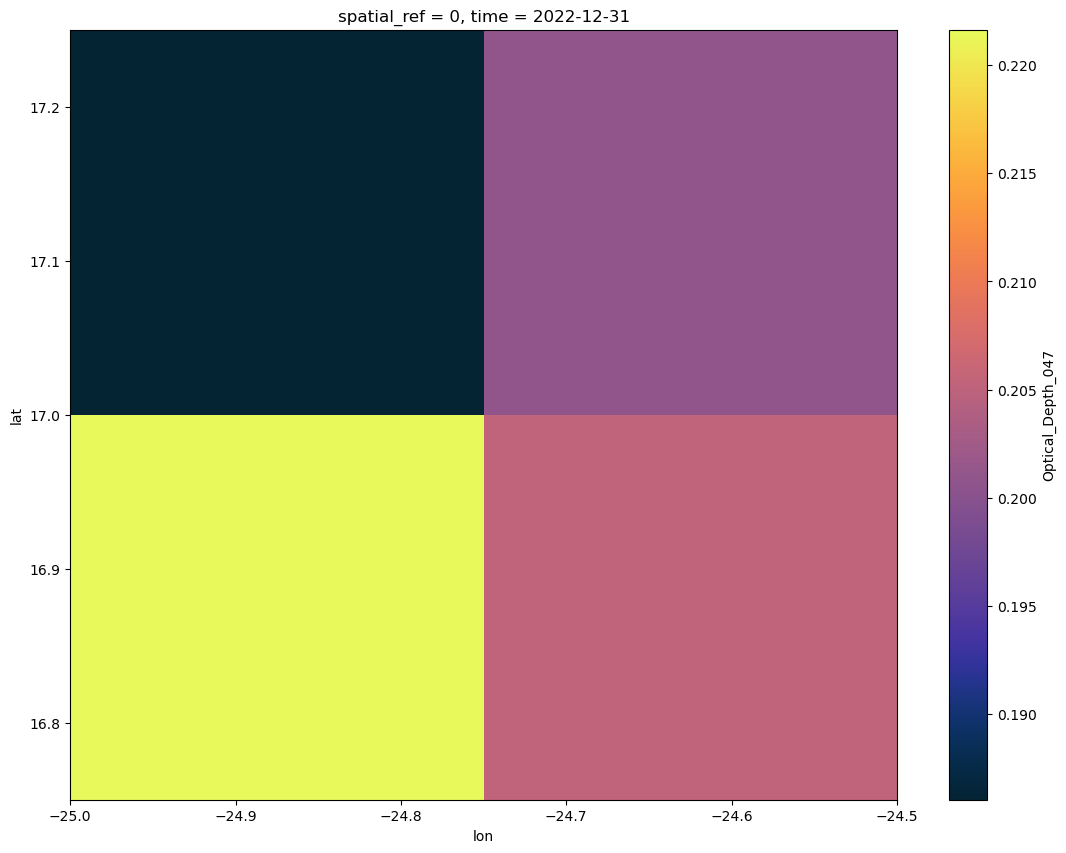

In [47]:
for i in range(5):
    latitude_range = (data_mindelo.iloc[i,4], data_mindelo.iloc[i,2])
    longitude_range = (data_mindelo.iloc[i,3], data_mindelo.iloc[i,1])
    print("Latitude range", latitude_range)
    print("Longitude range", longitude_range)
    region_name = data_mindelo.iloc[i,0]
    time_range = ("2022-12-01", "2024-03-01")
    plotTimeSeriesRegion(latitude_range, longitude_range, time_range, region_name)

In [20]:
import xarray

In [21]:
ds_lidar = xr.open_dataset("/home/jovyan/shared_materials/challenge_2_data/cloudnet/mindelo_pollyxt_daily_means.nc")

In [63]:
ds_lidar = ds_lidar.sel(time = slice("2022-10-10",  "2024-01-30"))

In [64]:
"""
plot = ds_lidar.isel(range=0).depolarisation.hvplot(label=str(ds_lidar.range.data[0]), title="depolarisation")
for n in range(2, 20):
    plot *= ds_lidar.isel(range=n).depolarisation.hvplot(label=str(ds_lidar.range.data[n]))

display(plot.opts(width=1000, height=600))
"""

'\nplot = ds_lidar.isel(range=0).depolarisation.hvplot(label=str(ds_lidar.range.data[0]), title="depolarisation")\nfor n in range(2, 20):\n    plot *= ds_lidar.isel(range=n).depolarisation.hvplot(label=str(ds_lidar.range.data[n]))\n\ndisplay(plot.opts(width=1000, height=600))\n'

In [65]:
ds_lidar.isel(range=0).depolarisation


<xarray.DataArray 'depolarisation' (time: 478)>
[478 values with dtype=float32]
Coordinates:
    range    float32 3.75
  * time     (time) datetime64[ns] 2022-10-10 2022-10-11 ... 2024-01-30
Attributes:
    units:      1
    long_name:  Lidar volume linear depolarisation ratio
    comment:    SNR-screened lidar volume linear depolarisation ratio at 532 nm.

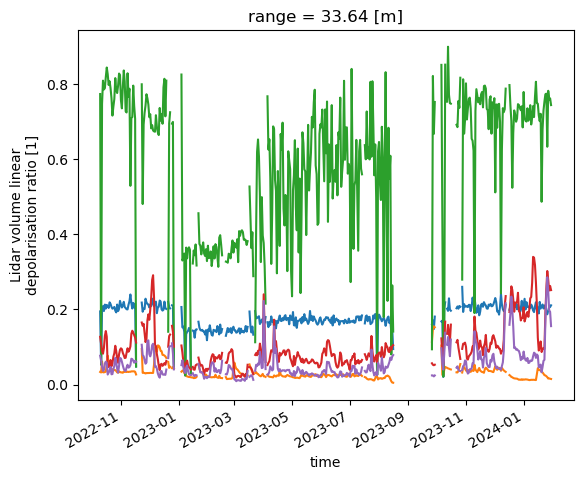

In [66]:
for i in range(0,5):
    ds_lidar.isel(range=i).depolarisation.plot()
#plt.legend()

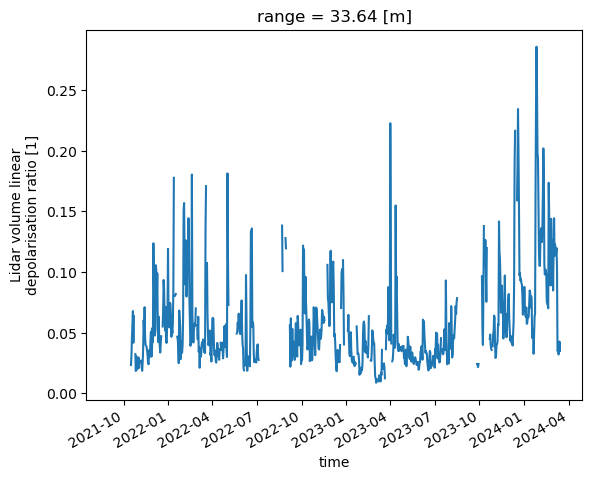

In [61]:
ds_lidar.isel(range=i).depolarisation.plot()

In [26]:
plot = ds_lidar.isel(range=2).depolarisation.hvplot(label=str(ds_lidar.range.data[0]), title="depolarisation")
for n in range(2, 20):
    plot *= ds_lidar.isel(range=n).depolarisation.hvplot(label=str(ds_lidar.range.data[n]))

display(plot.opts(width=1000, height=600))

AttributeError: 'DataArray' object has no attribute 'hvplot'